In [2]:
### subroutine to plot the model as a grid
import matplotlib.pyplot as plt

def plot_grid(name):
    plt.rcParams['figure.figsize'] = [4,4]  ## sets the size of the image

    fig, ax = plt.subplots()
    ax.imshow(name)

    # Set ticks and labels 
    ax.set_xticks(np.arange(0.5, n, 1))
    ax.set_yticks(np.arange(0.5, n, 1))
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # add grid lines  
    ax.grid(color='black', linewidth=0.3)
    plt.show()
    return

[[[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]]
initial temperature anomaly:
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


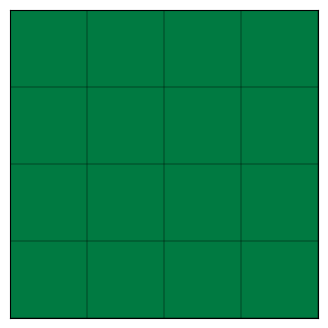

In [3]:
## 
import matplotlib.pyplot as plt
import numpy as np
##############################################################  setup


n=4 ## number of grid points is n*n

ocean=np.array([14/255,0/255,117/255])   
shallowocean =np.array([116/255,132/255,252/255])
glacier=np.array([191/255,232/255,255/255]) ## ice on land (glacier)
icefloat=np.array([0.9,0.9,1])  ## sea ice  
land=np.array([0/255,122/255,65/255]) 
lowland=np.array([255/255,210/255,150/255])
destroyedland=np.array([1,0,0]) # for later

geography={'ocean':ocean,'shallowocean':shallowocean,'glacier':glacier,'icefloat':icefloat,\
      'land':land,'lowland':lowland}

######################################  initiaize model (geography)
background=[[land]*n]*n
grid_colours=background.copy()
clim_model=np.array(grid_colours)  ## initializes the model to all land
print(clim_model)

#clim_model[1,2]=shallowocean
#clim_model[2,0]=glacier
#clim_model[2,2]=lowland

model_over_time=[]
model_over_time.append(clim_model)

######################################  initialize temperature

init_temperature=np.array([[0]*n]*n)
print("initial temperature anomaly:\n", init_temperature)
temp_inc = 0.018 #average annual temp increase 
temp_over_time=[]
temp_over_time.append(init_temperature)

######################################  plot
plot_grid(clim_model)


In [4]:
### temperature change over time 
t = 100
temp_at_t = init_temperature
for i in range(t):
    temp_at_t = temp_at_t+[[temp_inc]*n]
    temp_over_time.append(temp_at_t)

    
temp_at_t

array([[1.8, 1.8, 1.8, 1.8],
       [1.8, 1.8, 1.8, 1.8],
       [1.8, 1.8, 1.8, 1.8],
       [1.8, 1.8, 1.8, 1.8]])

In [5]:
def what_is(x,y):  ##inquires about the colour (nature) of a cell in the model grid
    for k,v in geography.items():
        if np.all(clim_model[x,y]==np.array(v)):
            whatis=k
    return whatis

print(what_is(3,2))
print(what_is(1,2))
print(what_is(3,3))

land
land
land


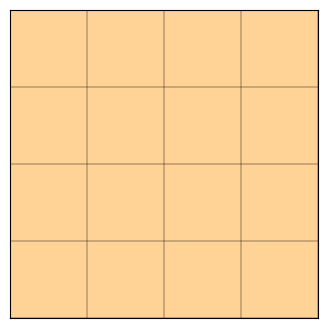

[[[1.         0.82352941 0.58823529]
  [1.         0.82352941 0.58823529]
  [1.         0.82352941 0.58823529]
  [1.         0.82352941 0.58823529]]

 [[1.         0.82352941 0.58823529]
  [1.         0.82352941 0.58823529]
  [1.         0.82352941 0.58823529]
  [1.         0.82352941 0.58823529]]

 [[1.         0.82352941 0.58823529]
  [1.         0.82352941 0.58823529]
  [1.         0.82352941 0.58823529]
  [1.         0.82352941 0.58823529]]

 [[1.         0.82352941 0.58823529]
  [1.         0.82352941 0.58823529]
  [1.         0.82352941 0.58823529]
  [1.         0.82352941 0.58823529]]]


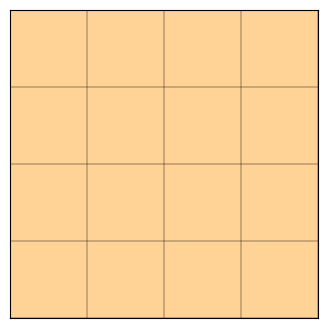

In [6]:
for i in range(n):
    for j in range(n):
        g=what_is(i,j)
        if g=='land':
            clim_model[i,j]=lowland
        elif g=='ocean':
            clim_model[i,j]=shallowocean

plot_grid(clim_model)
print(clim_model)
##########  plotting
fig, ax = plt.subplots()
ax.imshow(clim_model)

# Set ticks and labels (not really needed)
ax.set_xticks(np.arange(0.5, n, 1))
ax.set_yticks(np.arange(0.5, n, 1))
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_xticklabels([])
ax.set_yticklabels([])
# add grid lines  
ax.grid(color='black', linewidth=0.3)
plt.show()            
    